<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/09_Regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras


In [4]:
filepath = keras.utils.get_file('auto-mpg.data',"http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
filepath

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [10]:
colnames=['mpg','cylinders','displacement','horsepower','weight','accelrt','modelyear','origin']
data = pd.read_csv(filepath, names=colnames, na_values="?",comment='\t', sep=' ', skipinitialspace=True) # handles both space and tabs
data.head()
# PANDAS TUTORIAL
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


,mpg,cylinders,displacement,horsepower,weight,accelrt,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [14]:
#data.info() # no. of non nulls
data.isna().sum() # no. of nulls


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
accelrt         0
modelyear       0
origin          0
dtype: int64

In [17]:
# EASIEST WAY TO HANDLE NULLS -> DROP THEM!
# 6 null rows/398 total rows = 1.5 % data polluted 
df = data.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
accelrt         0
modelyear       0
origin          0
dtype: int64

In [19]:
# LABEL ENCODING, MULTI-HOT ENCODING <- already seen
# but here, ORIGIN is a categorical column
# 1-> USA, 2-> Europe, 3-> Japan 
# CATEGORICAL VALUES SHOULD BE ONE-HOT ENCODING
# 1-hot encoding-> each category becomes it's own column
# Assume ORIGIN 1-> BLR, 2-> NDLS, 3-> BOM
origin = df.pop('origin') # pop function returns and deletes the column from the dataset
df['BLR'] = (origin==1)*1
df['NDLS'] = (origin==2)*1
df['BOM'] = (origin==3)*1




KeyError: ignored

In [20]:
df.tail() # opposite of head-> shows data from bottom

,mpg,cylinders,displacement,horsepower,weight,accelrt,modelyear,BLR,NDLS,BOM
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


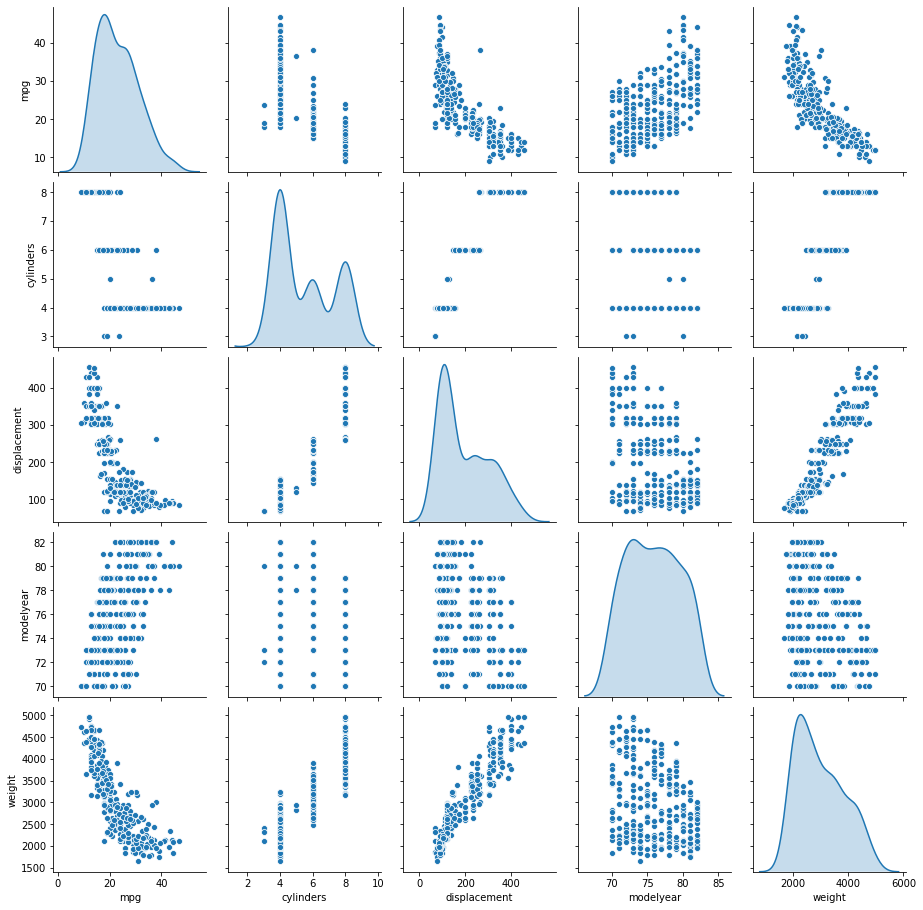

In [24]:
# SAMPLING is another way of creating training/testing/validation data 
traindata = df.sample(frac=0.75, random_state=42)
# for testing-> i cannot do sampling again, else we can end up with repeat rows in train/test
testdata = df.drop(traindata.index)
# DROP train from main data, whatever is left is testing data 
# WE SHUFFLED AND COLLECTED TRAINING DATA
# CORRELATION- HEATMAP, SCATTERPLOT (output distributed), distribution of inputs also 
# did all of this to arrive at most usable variable, discard the unsuitable ones 
sns.pairplot(traindata[['mpg','cylinders','displacement','weight']], diag_kind='kde')
plt.show()
# WHY WERE NOT 1-HOT-CATEGORIES ALSO PLOTTED?
# We have created 1-hot mapping, so that we could distinctly filter out data exclusively related to
# that category 
# these columns should be used ONLY for filtering and NOT for ML or DL 

In [0]:
# 2 discrete values in a category? Label Encoding is good enough-> 1 and 0 will create a gap between data, good enough for
# classification or filtering(regression)
# >2 discrete values in a category? One-Hot Encoding
 # WHATEVER MU and SIGMA, i decide for train, i can also use for test <- another way to fight overfitting 
trainy = traindata.pop('mpg')
testy = testdata.pop('mpg')
# std, mean -> z-score for normalization
# T -> transpose


In [0]:
stats = traindata.describe().T

In [0]:
# to fight overfitting, you can calculate mu and sigma only for training dataset,
# and apply same values to test dataset also 
mu = stats['mean']
sigma = stats['std']
trainx = (traindata - mu)/sigma 
testx = (testdata - mu)/sigma 
# Z-Score Normalization from -inf to +inf

In [33]:
trainx.head()
# Either I can proceed with this data and see how model behaves
# Above works, because the correct category becomes positive, while other categories become negative 
# as a result, the gap between these discrete values will be even more than 0 and 1 gap  
# or normalize only the required columns and create a diff model to see how that behaves 

,cylinders,displacement,horsepower,weight,accelrt,modelyear,BLR,NDLS,BOM
79,-0.876718,-0.947883,-0.924091,-0.939884,0.877874,-1.059696,-1.263456,2.153606,-0.510796
276,-0.876718,-0.710868,0.245640,-0.226985,0.062016,0.562963,-1.263456,2.153606,-0.510796
248,-0.876718,-0.995286,-1.152951,-1.397504,0.310321,0.562963,-1.263456,-0.462758,1.951072
56,-0.876718,-0.995286,-0.898662,-1.215162,1.764677,-1.330139,0.788788,-0.462758,-0.510796
393,-0.876718,-0.530736,-0.491799,-0.232867,0.026544,1.644736,0.788788,-0.462758,-0.510796


In [0]:
# let's build the model

